# Machine Learning Engineer Nanodegree
## Capstone Project

Vladimir Baranov

January 12th, 2018


## II. Analysis

### Data Exploration

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from IPython.display import Image

# Pretty display for notebooks
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [50]:
#Read the data
data_train = pd.read_csv("data/train_users_2.csv",parse_dates=[1,2])
data_test=pd.read_csv("data/test_users.csv",parse_dates=[1,2])
data_train_len=data_train.shape[0]
data_test_len=data_test.shape[0]

In [51]:
display(data_train.T.iloc[:,0:5])
print "Number of rows, columns in training set: " + str(data_train.shape)
display(data_test.T.iloc[:,0:5])
print "Number of rows, columns in test set: " + str(data_test.shape)

,0,1,2,3,4
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4
date_account_created,2010-06-28 00:00:00,2011-05-25 00:00:00,2010-09-28 00:00:00,2011-12-05 00:00:00,2010-09-14 00:00:00
timestamp_first_active,2009-03-19 04:32:55,2009-05-23 17:48:09,2009-06-09 23:12:47,2009-10-31 06:01:29,2009-12-08 06:11:05
date_first_booking,NaN,NaN,2010-08-02,2012-09-08,2010-02-18
gender,-unknown-,MALE,FEMALE,FEMALE,-unknown-
age,NaN,38,56,42,41
signup_method,facebook,facebook,basic,facebook,basic
signup_flow,0,0,3,0,0
language,en,en,en,en,en
affiliate_channel,direct,seo,direct,direct,direct


Number of rows, columns in training set: (213451, 16)


,0,1,2,3,4
id,5uwns89zht,jtl0dijy2j,xx0ulgorjt,6c6puo6ix0,czqhjk3yfe
date_account_created,2014-07-01 00:00:00,2014-07-01 00:00:00,2014-07-01 00:00:00,2014-07-01 00:00:00,2014-07-01 00:00:00
timestamp_first_active,2014-07-01 00:00:06,2014-07-01 00:00:51,2014-07-01 00:01:48,2014-07-01 00:02:15,2014-07-01 00:03:05
date_first_booking,NaN,NaN,NaN,NaN,NaN
gender,FEMALE,-unknown-,-unknown-,-unknown-,-unknown-
age,35,NaN,NaN,NaN,NaN
signup_method,facebook,basic,basic,basic,basic
signup_flow,0,0,0,0,0
language,en,en,en,en,en
affiliate_channel,direct,direct,direct,direct,direct


Number of rows, columns in test set: (62096, 15)


Here is the list of features in the main dataset:

* **date_account_created**: yyyy-mm-dd
* **timestamp_first_active**: yyyy-mm-dd hh:mm:ss
* **gender**: 'male','female', NaN
* **age**: continuous, NaN 
* **signup_method**: 'basic', 'facebook', 'google', 'weibo'
* **signup_flow**: 0, 25, 12,  3,  2, 23, 24,  1,  8,  6, 21,  5, 20, 16, 15, 14, 10, 4 (categorical)
* **language**: 'en', 'zh', 'fr', 'es', 'ko', 'de', 'it', 'ru', 'ja', 'pt', 'sv', 'nl', 'tr', 'da', 'pl', 'no', 'cs', 'el', 'th', 'hu', 'id', 'fi', 'ca', 'is', 'hr', nan
* **affiliate_channel**: 'direct', 'sem-brand', 'sem-non-brand', 'seo', 'other', 'api', 'content', 'remarketing'
* **affiliate_provider**: 'direct', 'google', 'other', 'facebook', 'bing', 'craigslist', 'padmapper', 'vast', 'yahoo', 'facebook-open-graph', 'gsp', 'meetup', 'email-marketing', 'naver', 'baidu', 'yandex', 'wayn', 'daum'
* **first_affiliate_tracked**: nan, 'linked', 'omg', 'tracked-other', 'product', 'marketing', 'local ops'
* **signup_app**: 'Web', 'iOS', 'Android', 'Moweb'
* **first_device_type**: 'Mac Desktop', 'Windows Desktop', 'iPhone', 'iPad', 'Other/Unknown', 'Android Phone', 'Android Tablet', 'Desktop (Other)', 'SmartPhone (Other)'
* **first_browser**: 'Chrome', 'Safari', nan, 'Firefox', 'Mobile Safari', 'IE', 'Chrome Mobile', 'Android Browser', 'AOL Explorer', 'Opera', 'Silk', 'IE Mobile', 'BlackBerry Browser', 'Chromium', 'Mobile Firefox', 'Maxthon', 'Apple Mail', 'Sogou Explorer', 'SiteKiosk', 'RockMelt', 'Iron', 'Yandex.Browser', 'IceWeasel', 'Pale Moon', 'CometBird', 'SeaMonkey', 'Camino', 'TenFourFox', 'Opera Mini', 'wOSBrowser', 'CoolNovo', 'Avant Browser', 'Opera Mobile', 'Mozilla', 'SlimBrowser', 'Comodo Dragon', 'OmniWeb', 'Crazy Browser', 'TheWorld Browser', 'Flock', 'PS Vita browser', 'IceDragon', 'Googlebot', 'Conkeror', 'Arora', 'UC Browser', 'Stainless', 'Google Earth', 'IBrowse', 'NetNewsWire', 'Kindle Browser', 'Outlook 2007', 'Nintendo Browser', 'Palm Pre web browser', 'Epic'

In [52]:
# Separating labels
target=data_train.country_destination
data_train = data_train.drop(['country_destination'], axis=1)

# Combining train and test dataset for cleaning
data = pd.concat((data_train, data_test), axis=0, ignore_index=True)

print "Number of rows, columns in combined dataset: " + str(data.shape)

Number of rows, columns in combined dataset: (275547, 15)


In [5]:
target.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [53]:
#Replacing '-unknown-', 'untracked', and 'OTHER' with NaN
data.replace('-unknown-',np.nan,inplace=True)
data.replace('untracked',np.nan,inplace=True)
data_test.replace('-unknown-',np.nan,inplace=True)
data_test.replace('untracked',np.nan,inplace=True)
data_train.replace('-unknown-',np.nan,inplace=True)
data_train.replace('untracked',np.nan,inplace=True)
data.replace('OTHER',np.nan,inplace=True)
data_test.replace('OTHER',np.nan,inplace=True)
data_train.replace('OTHER',np.nan,inplace=True)

In [54]:
#Statistical analysis of data
print 'Statistical analysis of data:\n'
display(data.describe())
#Checking the percentage of missing data
print "The percentage of missing data in training set:"
display(pd.isnull(data_train).sum()/data_train.shape[0]*100)
print "The percentage of missing data in test set:"
display(pd.isnull(data_test).sum()/data_test.shape[0]*100)
print "The percentage of missing data in combined set:"
display(pd.isnull(data).sum()/data.shape[0])

Statistical analysis of data:



,age,signup_flow
count,158681.000000,275547.000000
mean,47.145310,4.291965
std,142.629468,8.794313
min,1.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,42.000000,1.000000
max,2014.000000,25.000000


The percentage of missing data in training set:


id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                     44.961139
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked    54.015676
signup_app                  0.000000
first_device_type           0.000000
first_browser              12.773892
dtype: float64

The percentage of missing data in test set:


id                           0.000000
date_account_created         0.000000
timestamp_first_active       0.000000
date_first_booking         100.000000
gender                      54.502705
age                         46.502190
signup_method                0.000000
signup_flow                  0.000000
language                     0.001610
affiliate_channel            0.000000
affiliate_provider           0.000000
first_affiliate_tracked     54.704007
signup_app                   0.000000
first_device_type            0.000000
first_browser               27.583097
dtype: float64

The percentage of missing data in combined set:


id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.677340
gender                     0.471114
age                        0.424124
signup_method              0.000000
signup_flow                0.000000
language                   0.000004
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.541708
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.161112
dtype: float64

In [55]:
# Load session data
sessions = pd.read_csv('data/sessions.csv')
sessions.head()
print "Number of rows, columns in sessions set: " + str(data_train.shape)

Number of rows, columns in sessions set: (213451, 15)


The sessions set has 6 features. It contains information of different user sessions in each line totalling to 10567737 lines. 

### Exploratory Visualization

Let us visualize some properties of our dataset.

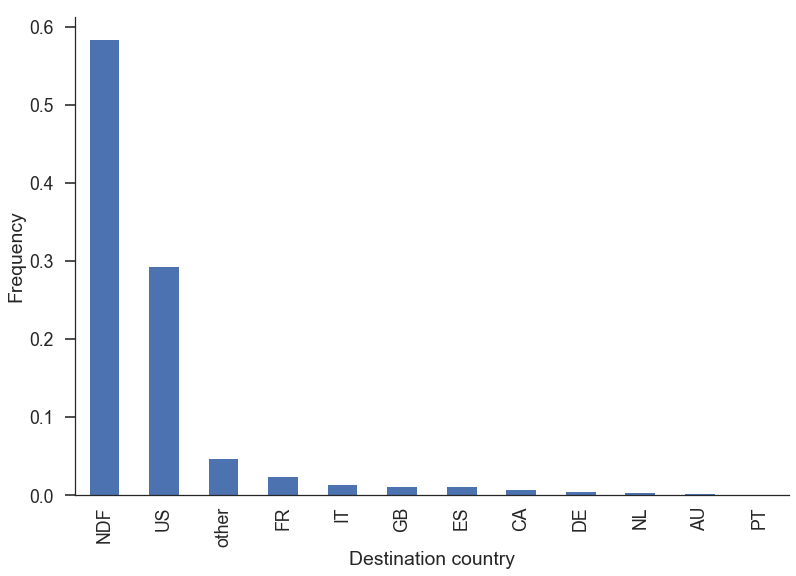

In [9]:
target.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Destination country')
plt.ylabel('Frequency')
sns.despine()

As we pointed out earlier, the major category is 'NDF', followed by 'US'. This two categories correspond to about 90% of the data.

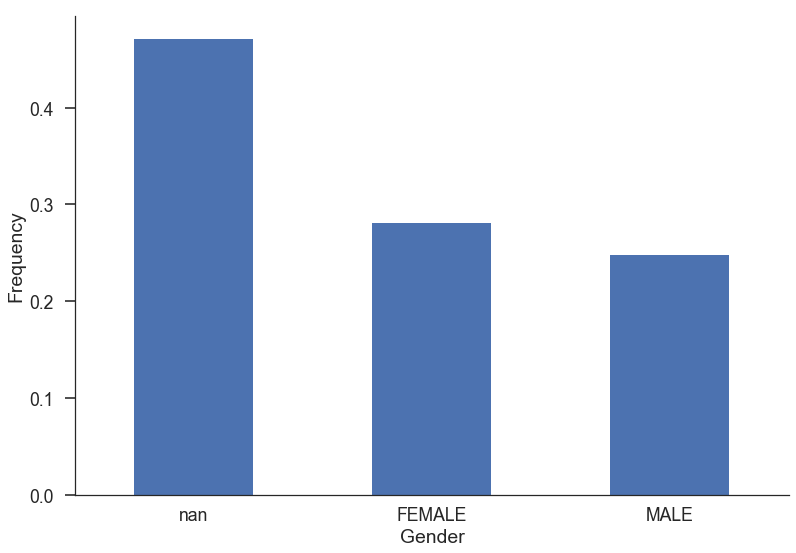

In [10]:
data.gender.value_counts(dropna=False,normalize=True).plot(kind='bar', rot=0)
plt.xlabel('Gender')
plt.ylabel('Frequency')
sns.despine()

There is also about 50% of missing 'gender' data.

In [11]:
data.gender.value_counts()

FEMALE    77524
MALE      68209
Name: gender, dtype: int64

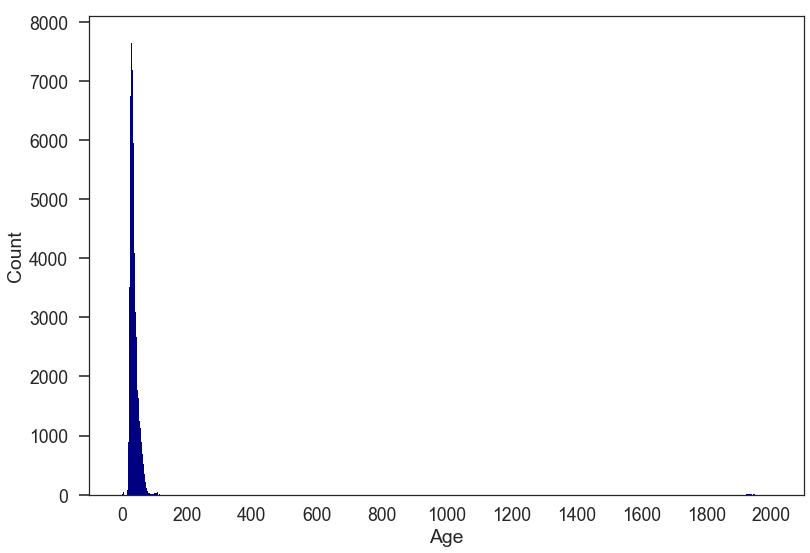

In [12]:
plt.hist(data.age.dropna(), bins=range(0,2000), color='navy')
plt.xticks(range(0,2020,200))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

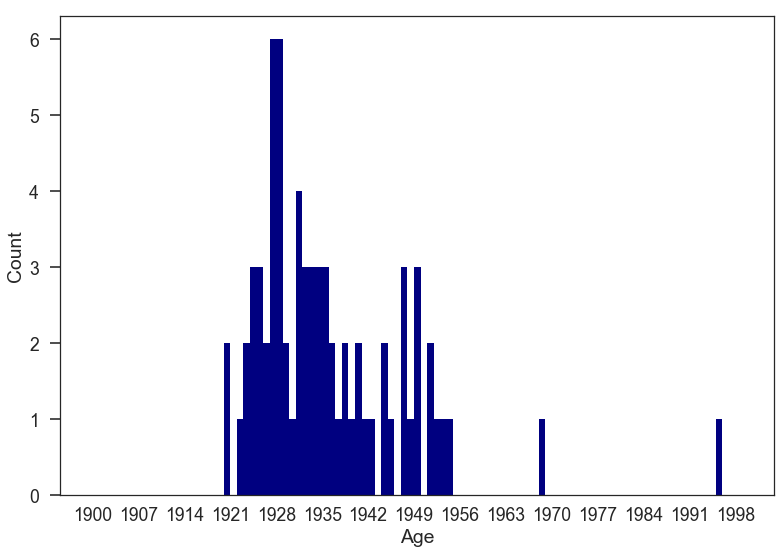

In [13]:
plt.hist(data.age.dropna(), bins=range(1900,2000), color='navy')
plt.xticks(range(1900,2000,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

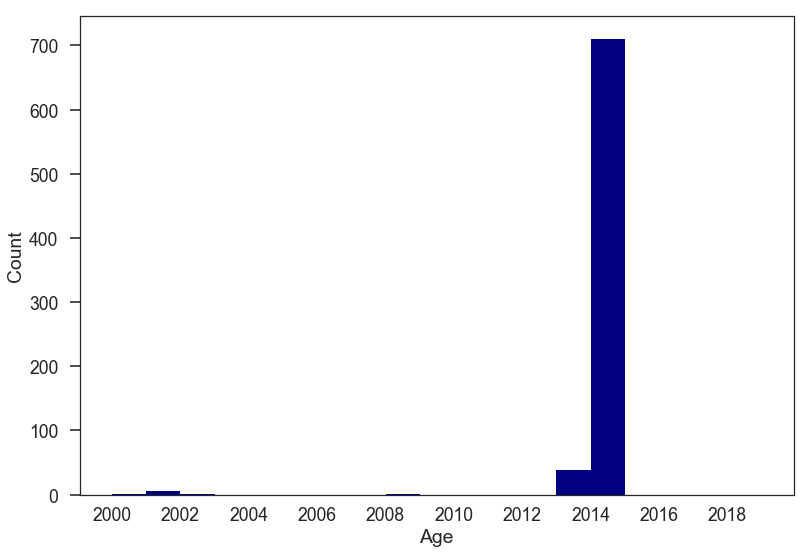

In [14]:
plt.hist(data.age.dropna(), bins=range(2000,2020), color='navy')
plt.xticks(range(2000,2020,2))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

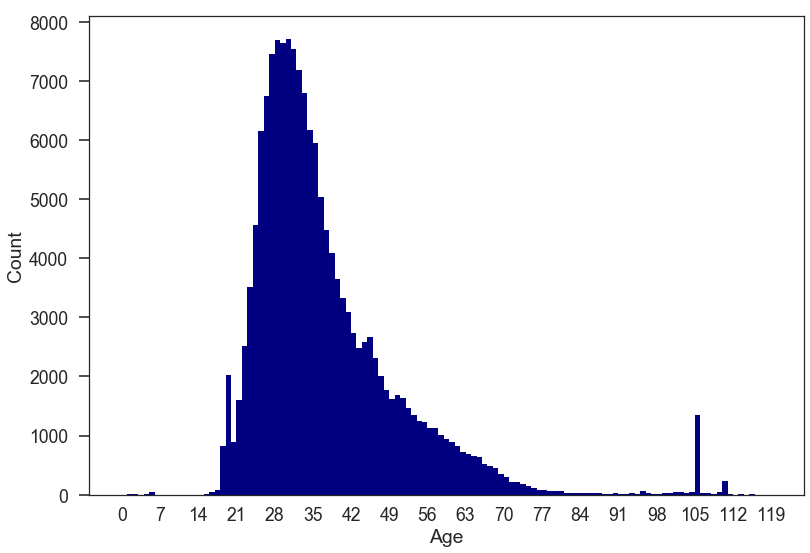

In [15]:
plt.hist(data.age.dropna(), bins=range(0,120), color='navy')
plt.xticks(range(0,120,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## III. Methodology

### Data Preprocessing

In [56]:
#Dropping date_first_booking
data=data.drop(['date_first_booking'],axis=1)

C:\Users\Vladimir\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Vladimir\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Vladimir\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vladimir\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


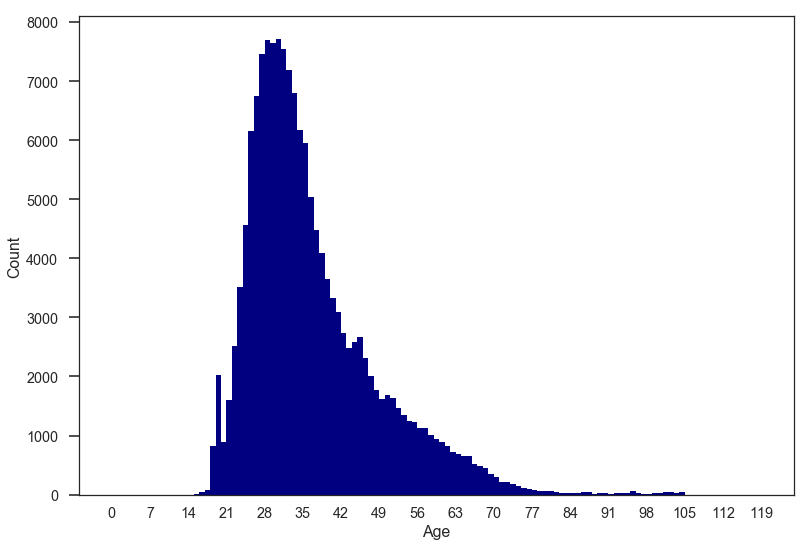

In [59]:
#Cleaning age
data.age = np.where((data.age.values<15) | (data.age.values>1999), np.nan, data.age.values)
data.age = np.where(data.age.values>1900, 2014-data.age.values, data.age.values)
data.age=np.where(data.age.values>104,np.nan,data.age.values)
#data.age=np.where((data.age.values<15) | (data.age.values>104) | (data.age.values<=1900) ,np.nan,data.age.values)

plt.hist(data.age.dropna(), bins=range(0,120), color='navy')
plt.xticks(range(0,120,7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [60]:
data['date_account_created'] = pd.to_datetime(data['date_account_created'])
data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'])

In [61]:
#Creating new features from date and time fields
data['dac_day']=data['date_account_created'].dt.weekday
#data['dac_day']=data['date_account_created'].apply(lambda x:x.weekday)

#data['dac_day']=np.vstack(data.date_account_created.apply(lambda x: list(map(int, x.dt.weekday))).values)
data['dac_week']=data['date_account_created'].dt.week
data['dac_month']=data['date_account_created'].dt.month
data['dac_quarter']=data['date_account_created'].dt.quarter
data['dac_year']=data['date_account_created'].dt.year

data['tfa_day']=data['timestamp_first_active'].dt.weekday
data['tfa_week']=data['timestamp_first_active'].dt.week
data['tfa_month']=data['timestamp_first_active'].dt.month
data['tfa_quarter']=data['timestamp_first_active'].dt.quarter
data['tfa_year']=data['timestamp_first_active'].dt.year
data['tfa_hour']=data['timestamp_first_active'].dt.hour

#data['delta_t']=data['date_account_created'] - data['timestamp_first_active'] #).dt.days

tfa_hours=data['timestamp_first_active'].dt.hour
conditions_tod = [
    ((tfa_hours>=0)&(tfa_hours<=7) ),
    ((tfa_hours>=8)&(tfa_hours<=12)),
    ((tfa_hours>=13)&(tfa_hours<=17)),
    ((tfa_hours>=18)&(tfa_hours<=23))]
choices_tod = ['night','morning','afternoon','evening']
data['tfa_tod'] = np.select(conditions_tod, choices_tod)

tfa_months=data['timestamp_first_active'].dt.month
conditions_seasons = [
    ((tfa_months==12)|(tfa_months<=2) ),
    ((tfa_months>=3)&(tfa_months<=5)),
    ((tfa_months>=6)&(tfa_months<=8)),
    ((tfa_months>=9)&(tfa_months<=12))]
choices_seasons = ['winter','spring','summer','autumn']
data['tfa_season'] = np.select(conditions_seasons, choices_seasons)

In [62]:
# Dropping the now unneccessary columns
data.drop(['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)

In [63]:
#Filling NaNs
data.language.fillna(data.language.value_counts().index[0],inplace=True)
data.age.fillna(-1,inplace=True)
data.fillna('missing',inplace=True)

In [64]:
display(data.T.iloc[:,0:5])

,0,1,2,3,4
id,gxn3p5htnn,820tgsjxq7,4ft3gnwmtx,bjjt8pjhuk,87mebub9p4
gender,missing,MALE,FEMALE,FEMALE,missing
age,-1,38,56,42,41
signup_method,facebook,facebook,basic,facebook,basic
signup_flow,0,0,3,0,0
language,en,en,en,en,en
affiliate_channel,direct,seo,direct,direct,direct
affiliate_provider,direct,google,direct,direct,direct
first_affiliate_tracked,missing,missing,missing,missing,missing
signup_app,Web,Web,Web,Web,Web


** Featureset after data engeneering **
* **id**
* **gender**: 'male','female', NaN
* **age**: continuous, NaN 
* **signup_method**: 'basic', 'facebook', 'google', 'weibo'
* **signup_flow**: 0, 25, 12,  3,  2, 23, 24,  1,  8,  6, 21,  5, 20, 16, 15, 14, 10, 4 (categorical)
* **language**: 'en', 'zh', 'fr', 'es', 'ko', 'de', 'it', 'ru', 'ja', 'pt', 'sv', 'nl', 'tr', 'da', 'pl', 'no', 'cs', 'el', 'th', 'hu', 'id', 'fi', 'ca', 'is', 'hr', nan
* **affiliate_channel**: 'direct', 'sem-brand', 'sem-non-brand', 'seo', 'other', 'api', 'content', 'remarketing'
* **affiliate_provider**: 'direct', 'google', 'other', 'facebook', 'bing', 'craigslist', 'padmapper', 'vast', 'yahoo', 'facebook-open-graph', 'gsp', 'meetup', 'email-marketing', 'naver', 'baidu', 'yandex', 'wayn', 'daum'
* **first_affiliate_tracked**: nan, 'linked', 'omg', 'tracked-other', 'product', 'marketing', 'local ops'
* **signup_app**: 'Web', 'iOS', 'Android', 'Moweb'
* **first_device_type**: 'Mac Desktop', 'Windows Desktop', 'iPhone', 'iPad', 'Other/Unknown', 'Android Phone', 'Android Tablet', 'Desktop (Other)', 'SmartPhone (Other)'
* **first_browser**: 'Chrome', 'Safari', nan, 'Firefox', 'Mobile Safari', 'IE', 'Chrome Mobile', 'Android Browser', 'AOL Explorer', 'Opera', 'Silk', 'IE Mobile', 'BlackBerry Browser', 'Chromium', 'Mobile Firefox', 'Maxthon', 'Apple Mail', 'Sogou Explorer', 'SiteKiosk', 'RockMelt', 'Iron', 'Yandex.Browser', 'IceWeasel', 'Pale Moon', 'CometBird', 'SeaMonkey', 'Camino', 'TenFourFox', 'Opera Mini', 'wOSBrowser', 'CoolNovo', 'Avant Browser', 'Opera Mobile', 'Mozilla', 'SlimBrowser', 'Comodo Dragon', 'OmniWeb', 'Crazy Browser', 'TheWorld Browser', 'Flock', 'PS Vita browser', 'IceDragon', 'Googlebot', 'Conkeror', 'Arora', 'UC Browser', 'Stainless', 'Google Earth', 'IBrowse', 'NetNewsWire', 'Kindle Browser', 'Outlook 2007', 'Nintendo Browser', 'Palm Pre web browser', 'Epic'
* **dac_day**: 0, 1, 2, 3, 4, 5, 6 (categorical)
* **dac_week**: 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53 (categorical)
* **dac_month**: 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12 (categorical)
* **dac_quarter**: 1,  2,  3,  4 (categorical)
* **dac_year**: 2010, 2011, 2012, 2013, 2014 (categorical)
* **tfa_day**: 0, 1, 2, 3, 4, 5, 6 (categorical)
* **tfa_week**: 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53 (categorical)
* **tfa_month**: 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12 (categorical)
* **tfa_quarter**: 1,  2,  3,  4 (categorical)
* **tfa_year**: 2009, 2010, 2011, 2012, 2013, 2014 (categorical)
* **tfa_hour**: 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23(categorical)
* **tfa_tod**: 'afternoon', 'evening', 'morning', 'night'(categorical)
* **tfa_season**: 'autumn', 'spring', 'summer', 'winter'(categorical)

In [23]:
#One-hot-encoding features
ohe_features = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', \
             'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'tfa_tod', 'tfa_season', \
             'dac_month', 'dac_quarter', 'dac_year', 'tfa_day', 'tfa_week', 'tfa_month', 'tfa_quarter',  'tfa_year', \
             'tfa_hour',  'dac_day', 'dac_week']

for f in ohe_features:
    data_dummy = pd.get_dummies(data[f], prefix=f)
    data = data.drop([f], axis=1)
    data = pd.concat((data, data_dummy), axis=1)

In [24]:
print 'Dataset after OHE contains {} rows and {} columns.'.format(data.shape[0], data.shape[1])

Dataset after OHE contains 275547 rows and 348 columns.


In [25]:
#Split data back into train and test sets
vals = data.drop(['id'], axis=1).values
#piv_train = train.shape[0]
X = vals[:data_train_len]
X_test = vals[data_train_len:]

# Create numeric label for each of the 12 target labels
labels = target.values
le = LabelEncoder()
y = le.fit_transform(labels)
truth = pd.Series(le.inverse_transform(y))

### NDCG Scoring Function

A custom NDCG scorer from kaggle scripts will be used for training.

ref: https://www.kaggle.com/dietcoke/score-predictions-using-ndcg

In [26]:
"""Metrics to compute the model performance."""
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer

def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.
        
    Returns
    -------
    score : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

def ndcg_score(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    #lb.fit(range(len(predictions) + 1))  ## original
    #lb.fit(range(predictions.shape[1] + 1))
    #T = lb.transform(ground_truth)
    
    T = lb.fit_transform(ground_truth) 

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

In [27]:
def dcg_at_k(r, k, method=1):
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


def ndcg_at_k(r, k=5, method=1):
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max


def score_predictions(preds, truth, n_modes=5):
    """
    preds: pd.DataFrame
      one row for each observation, one column for each prediction.
      Columns are sorted from left to right descending in order of likelihood.
    truth: pd.Series
      one row for each obeservation.
    """
    assert(len(preds)==len(truth))

    r = pd.DataFrame(0, index=preds.index, columns=preds.columns, dtype=np.float64)
    for col in preds.columns:
        r[col] = (preds[col] == truth) * 1.0

    score = pd.Series(r.apply(ndcg_at_k, axis=1, reduce=True), name='score')
    return score.mean()

### Implementation

In [28]:
def train_predict(learner, X_train, y_train, X_test): 
    '''
    This function fits learner on training set, makes predictions, calculates NDCG score using custom metric, and prepares
    a csv file for submission to Kaggle.
    
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
    '''
    
    
    print learner.__class__.__name__,':\n'
    # Fitting the learner to the training data
    start = datetime.utcnow() # Get start time
    learner=learner.fit(X_train,y_train)
    end = datetime.utcnow() # Get end time
    
    # Calculating the training time
    print 'training time (min):', (end-start).total_seconds()/60
        
    # Getting the predictions on the training set
    start = datetime.utcnow() # Get start time
    y_pred_proba_train =learner.predict_proba(X_train)
    y_pred_train = np.argmax(y_pred_proba_train, axis=1)
    end = datetime.utcnow() # Get end time
    
    # Calculate the total prediction time
    print 'prediction time (sec):', (end-start).total_seconds()
           
    preds = []

    for i in range(len(X_train)):
        preds += [le.inverse_transform(np.argsort(y_pred_proba_train[i])[::-1])[:5].tolist()]

    preds = pd.DataFrame(preds)
    truth= pd.Series(le.inverse_transform(y_train))
    
    print 'NDCG score:',  str(score_predictions(preds, truth))
   
    print classification_report(y_train, y_pred_train)
    
    # make predictions on test set
    y_pred_proba_test = learner.predict_proba(X_test)
    id_test = data_test['id']
    # Taking the 5 classes with highest probabilities
    ids = []  #list of ids
    cts = []  #list of countries
    for i in range(len(id_test)):
        idx = id_test[i]
        ids += [idx] * 5
        cts += le.inverse_transform(np.argsort(y_pred_proba_test[i])[::-1])[:5].tolist()

    sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
    name=learner.__class__.__name__+'.csv'
    sub.to_csv(name,index=False)
   
    return 

In [29]:
clf = AdaBoostClassifier(random_state=10)
train_predict(clf, X, y, X_test)

AdaBoostClassifier :

training time (min): 0.600983333333
prediction time (sec): 7.686
NDCG score: 0.821567014409
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       0.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       0.00      0.00      0.00      2835
          7       0.67      0.87      0.75    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.48      0.40      0.44     62376
         11       0.00      0.00      0.00     10094

avg / total       0.53      0.62      0.57    213451



C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
clf = LogisticRegression(random_state=10)
train_predict(clf, X, y, X_test)

LogisticRegression :

training time (min): 2.30436666667
prediction time (sec): 0.654
prediction-proba time (sec): 0.729
NDCG score: 0.817994242046
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       0.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       0.00      0.00      0.00      2835
          7       0.65      0.88      0.75    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.47      0.34      0.39     62376
         11       0.00      0.00      0.00     10094

avg / total       0.52      0.61      0.55    213451



In [18]:
linear_svc = LinearSVC()     #The base estimator

# This is the calibrated classifier which can give probabilistic classifier
clf = CalibratedClassifierCV(linear_svc, method='sigmoid',  cv=3) 
train_predict(clf, X, y, X_test)

CalibratedClassifierCV :

training time (min): 26.5796833333
prediction time (sec): 2.439
prediction-proba time (sec): 2.348
NDCG score: 0.805188600348
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       0.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       1.00      0.00      0.00      2835
          7       0.59      0.99      0.74    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.45      0.04      0.07     62376
         11       1.00      0.00      0.00     10094

avg / total       0.54      0.59      0.45    213451



C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
clf = XGBClassifier(objective='multi:softprob', seed=10)
train_predict(clf, X, y, X_test)

XGBClassifier :

training time (min): 5.66936666667
prediction time (sec): 3.646
NDCG score: 0.826659971648
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       0.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       0.00      0.00      0.00      2835
          7       0.69      0.85      0.76    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.49      0.47      0.48     62376
         11       0.00      0.00      0.00     10094

avg / total       0.55      0.63      0.59    213451



### Refinement

We will utilize the sessions data by grouping users by user_id and action_detail and counting each unique action_detail event per user_id. This is then joined with our user data.

In [30]:
# Load session data
sessions = pd.read_csv('data/sessions.csv')
print sessions.shape
sessions.head()

(10567737, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [31]:
# group sessions by user and action_detail
group_uu = sessions.groupby(['user_id', 'action_detail'], as_index=False)
# count events and convert groupby to dataframe
events_uu = pd.DataFrame({'event_count' : group_uu.size() }).reset_index()
events_uu.head()

,user_id,action_detail,event_count
0,00023iyk9l,change_trip_characteristics,2
1,00023iyk9l,confirm_email_link,1
2,00023iyk9l,dashboard,4
3,00023iyk9l,header_userpic,2
4,00023iyk9l,message_post,1


In [32]:
# convert action_detail types to columns with pivot table
pivot_uu = events_uu.pivot_table('event_count', ['user_id'], ['action_detail'])
pivot_uu = pd.DataFrame(pivot_uu.reset_index())
# drop 'unknown' events
pivot_uu = pivot_uu.drop(['-unknown-'], axis=1)
pivot_uu.head()


action_detail,user_id,account_notification_settings,account_payment_methods,account_payout_preferences,account_privacy_settings,account_transaction_history,admin_templates,airbnb_picks_wishlists,alteration_field,alteration_request,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0
1,0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
2,001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002qnbzfs5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# fill NaNs in sessions data
pivot_uu.fillna(0,inplace=True)
# left join sessions data to user data
data_merged = pd.merge(left=data, right=pivot_uu, how='left', left_on='id', right_on='user_id')
# fill in nulls after the left join
data_merged = data_merged.fillna(0)
data_merged.drop('user_id', axis=1,inplace=True)
data_merged.head()

,id,age,gender_FEMALE,gender_MALE,gender_missing,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,...,view_resolutions,view_search_results,view_security_checks,view_user_real_names,wishlist,wishlist_content_update,wishlist_note,your_listings,your_reservations,your_trips
0,gxn3p5htnn,-1.0,0,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,820tgsjxq7,38.0,0,1,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4ft3gnwmtx,56.0,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,bjjt8pjhuk,42.0,1,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87mebub9p4,41.0,0,0,1,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#Split data back into train and test sets
vals = data_merged.drop(['id'], axis=1).values
#piv_train = train.shape[0]
X = vals[:data_train_len]
X_test = vals[data_train_len:]

# Create numeric label for each of the 12 target labels
labels = target.values
le = LabelEncoder()
y = le.fit_transform(labels)
truth = pd.Series(le.inverse_transform(y))

In [35]:
clf = XGBClassifier(objective='multi:softprob', seed=10)
train_predict(clf, X, y, X_test)

XGBClassifier :

training time (min): 8.14116666667
prediction time (sec): 4.758
NDCG score: 0.832246467537
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       0.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.86      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       1.00      0.00      0.00      2835
          7       0.70      0.86      0.77    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.51      0.50      0.50     62376
         11       0.25      0.00      0.00     10094

avg / total       0.61      0.65      0.60    213451



In [30]:
print clf

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=1)


## xgboost+gridsearch

In [21]:
param_grid = {'max_depth' : [3,6,9], 'learning_rate': [0.05, 0.1, 0.25], 'n_estimators': [50, 100, 200]}

# get the classifier
clf = XGBClassifier(objective='multi:softprob', seed=10)

#initiating grid search
reg = GridSearchCV(clf, param_grid, scoring=ndcg_scorer)

# fit the model
start = datetime.utcnow() # Get start time
reg.fit(X, y)
end = datetime.utcnow() # Get end time
# Calculate the total time
print 'fitting time (sec):', (end-start).total_seconds()

fitting time (sec): 58205.625


In [52]:
## get the best predictor
est = reg.best_estimator_
print(est)


# Make predictions using the optimized and model
best_predictions = est.predict(X_test)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=1)


In [53]:
reg.grid_scores_

C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.68473, std: 0.04721, params: {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.68328, std: 0.04306, params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.68007, std: 0.05620, params: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3},
 mean: 0.63554, std: 0.03675, params: {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 6},
 mean: 0.62089, std: 0.03630, params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 6},
 mean: 0.59937, std: 0.03360, params: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 6},
 mean: 0.59733, std: 0.04040, params: {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 9},
 mean: 0.59002, std: 0.04028, params: {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 9},
 mean: 0.56966, std: 0.05089, params: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 9},
 mean: 0.68142, std: 0.04411, params: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
 mean

In [58]:

reg.cv_results_

{'mean_fit_time': array([   161.15099994,    324.18866666,    640.40266665,    308.20800002,
           605.68466671,   1178.36500001,    433.02966674,    865.41766667,
          1727.90433335,    151.61099998,    300.33666666,    601.31033325,
           291.454     ,    578.98333327,  44838.77400001,    480.90233326,
           916.23866661,   1829.11766664,    155.08166671,    301.69000006,
           634.32333334,    291.92799997,    579.46633331,   1155.65633329,
           470.66933338,    899.06166681,   1842.54000004]),
 'mean_score_time': array([ 3.27433332,  3.52933335,  4.57699998,  3.50900006,  4.05433337,
         5.22066665,  3.59466664,  4.45633332,  7.84333332,  3.25799998,
         3.55966663,  4.17600012,  3.4216667 ,  3.97233335,  5.40799999,
         3.72600007,  4.67566673,  7.16400003,  3.21966656,  3.42400002,
         4.60566672,  3.29633339,  3.74633336,  4.82300011,  3.70933326,
         4.3866667 ,  7.0696667 ]),
 'mean_test_score': array([ 0.68473359,  0.683

In [25]:
#Making predictions on training set
y_pred_train = est.predict_proba(X)
truth = pd.Series(le.inverse_transform(y))
preds = []

for i in range(len(X)):
    preds += [le.inverse_transform(np.argsort(y_pred_train[i])[::-1])[:5].tolist()]

preds = pd.DataFrame(preds)
print 'NDCG score:',  str(score_predictions(preds, truth))
   
print classification_report(y, np.argmax(y_pred_train, axis=1))
    
# make predictions on test set
y_pred_test = est.predict_proba(X_test)
id_test = data_test['id']
# Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred_test[i])[::-1])[:5].tolist()

sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
name='best_xgboost2'+'.csv'
sub.to_csv(name,index=False)

NDCG score: 0.829469688931
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       539
          1       1.00      0.00      0.00      1428
          2       0.00      0.00      0.00      1061
          3       0.00      0.00      0.00      2249
          4       0.00      0.00      0.00      5023
          5       0.00      0.00      0.00      2324
          6       1.00      0.00      0.00      2835
          7       0.71      0.85      0.77    124543
          8       0.00      0.00      0.00       762
          9       0.00      0.00      0.00       217
         10       0.50      0.52      0.51     62376
         11       0.00      0.00      0.00     10094

avg / total       0.58      0.64      0.60    213451



C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## IV. Results
### Model Evaluation and Validation

In [ ]:
from numpy.random import random
#import random
#Generating noise
noise=np.random.random(data_train_len)*0.05
#Adding noise to 'age'
X[:,0]=X[:,0]+noise

In [ ]:
#Creating user numbers to delete randomly 
ran_ind=random.sample(range(0,data_train_len),10675)
X_cut=np.delete(X,ran_ind,0)#Getting the classifier
clf = XGBClassifier(objective='multi:softprob', seed=10)
train_predict(clf, X_cut, y_cut, X_test)
y_cut=np.delete(y,ran_ind,0)

In [99]:
#Getting the classifier
clf = XGBClassifier(objective='multi:softprob', seed=10)
train_predict(clf, X_cut, y_cut, X_test)

XGBClassifier :

training time (min): 7.69171666667
prediction time (sec): 3.919
NDCG score: 0.83237573164
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       510
          1       1.00      0.00      0.00      1344
          2       0.00      0.00      0.00      1010
          3       0.00      0.00      0.00      2144
          4       0.80      0.00      0.00      4776
          5       0.00      0.00      0.00      2224
          6       1.00      0.00      0.00      2698
          7       0.70      0.86      0.78    118266
          8       0.00      0.00      0.00       720
          9       0.00      0.00      0.00       208
         10       0.51      0.50      0.50     59283
         11       0.33      0.00      0.00      9593

avg / total       0.61      0.65      0.60    202776



C:\Users\Vladimir\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Justification

In [65]:
kaggle_scores=np.genfromtxt('kaggle_scores.csv', delimiter=',')
from __future__ import division #makes the / operator to perform a float division 
threshold_val=0.88249
#Calculating the percentile value corresponding to scores on Kaggle exceeding our best score
count_vals = sum(i >= threshold_val for i in kaggle_scores)
percentile_val = 100 * (float(count_vals)/len(kaggle_scores))
print 'Our solution falls in top {}% of the solutions on Kaggle.'.format(percentile_val)

Our solution falls in top 17.6349965824% of the solutions on Kaggle.


## V. Conclusion

### Free-Form Visualization

In [36]:
sns.set_context("poster", font_scale=0.9)
result = pd.read_csv('XGBClassifier-sessions.csv')

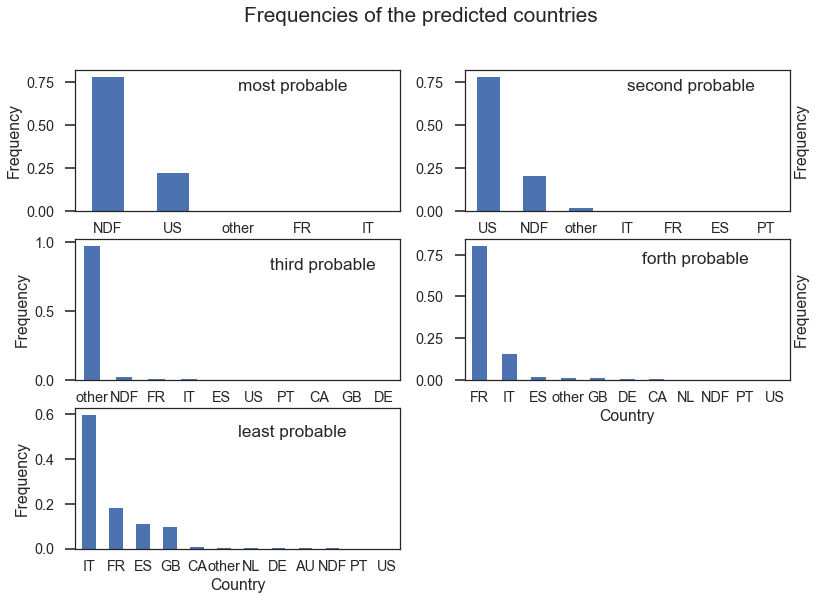

In [37]:
plt.figure(0)
ax1 = plt.subplot2grid((3,2), (0,0))
plt.ylabel('Frequency')
plt.text(2,0.7,'most probable')
ax2 = plt.subplot2grid((3,2), (0,1))
plt.ylabel('Frequency')
plt.text(3,0.7,'second probable')
ax2.yaxis.set_label_position("right")
ax3 = plt.subplot2grid((3,2), (1,0))
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.text(5.5,0.8,'third probable')
ax4 = plt.subplot2grid((3,2), (1,1))
plt.ylabel('Frequency')
plt.xlabel('Country')
ax4.yaxis.set_label_position("right")
plt.text(5.5,0.7,'forth probable')
ax5 = plt.subplot2grid((3,2), (2,0))
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.text(5.5,0.5,'least probable')

plt.suptitle('Frequencies of the predicted countries')

result.country[0::5].value_counts(normalize=True).plot(kind='bar', rot=0,ax=ax1)
result.country[1::5].value_counts(normalize=True).plot(kind='bar', rot=0,ax=ax2)
result.country[2::5].value_counts(normalize=True).plot(kind='bar', rot=0,ax=ax3)
result.country[3::5].value_counts(normalize=True).plot(kind='bar', rot=0,ax=ax4)
result.country[4::5].value_counts(normalize=True).plot(kind='bar', rot=0,ax=ax5)


plt.show()

In [38]:
top_countries=target.value_counts()[0:5].index.tolist()
preds=[]
for i in range(X.shape[0]):
    preds+=[top_countries]
preds = pd.DataFrame(preds)
print 'NDCG score for most frequent countries:',  str(score_predictions(preds, truth))

NDCG score for most frequent countries: 0.806765442038


In [39]:
#Preparing submission to Kaggle - most frequent countries
id_test = data_test['id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)): 
    idx = id_test[i]
    ids += [idx] * 5
cts+=target.value_counts()[0:5].index.tolist()*len(id_test)
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
name='benchmark.csv'
sub.to_csv(name,index=False)